<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/Bonus_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_file_path = '/content/tested.csv'  # Update this path to match your dataset location
output_file_path = '/content/cleaned_titanic.csv'

In [ ]:
data = pd.read_csv(data_file_path)
print("Data imported successfully!")
data.head()

Data imported successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Step 2: Data Cleaning
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Fill missing Age with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
# Drop Cabin column due to excessive missing values
data = data.drop(columns=['Cabin'])

In [ ]:
# Drop rows with missing values in 'Fare'
data = data.dropna(subset=['Fare'])

In [ ]:
print("\nMissing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


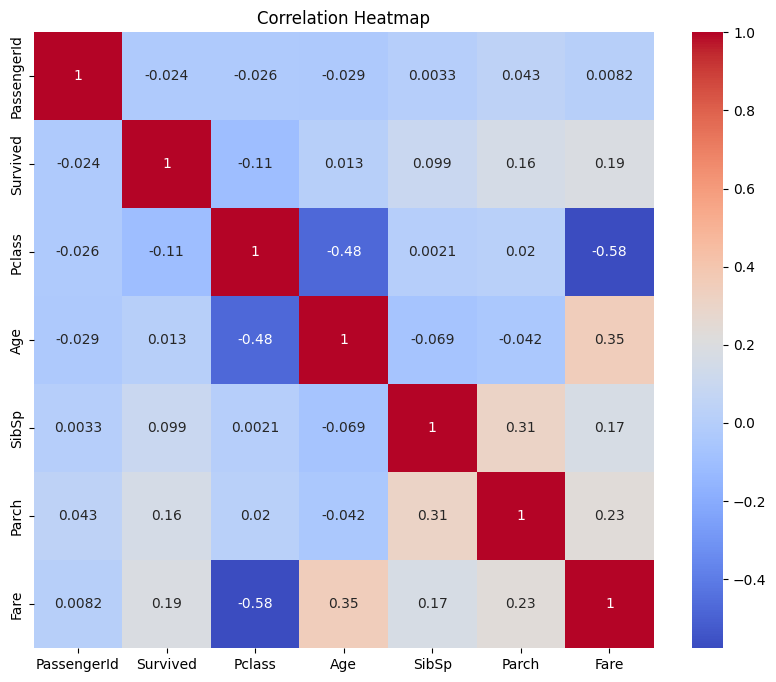

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

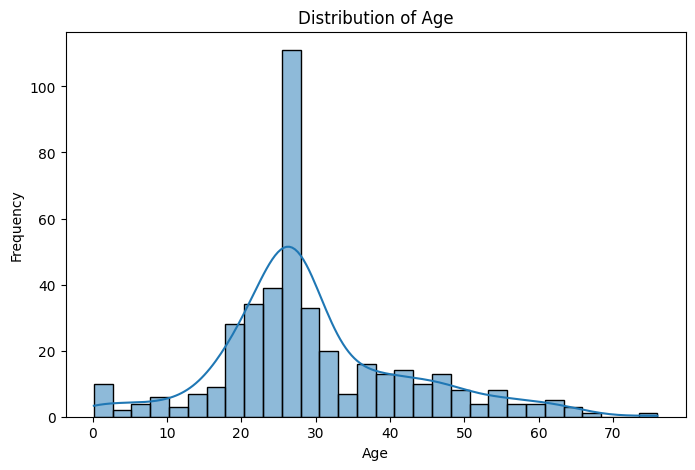

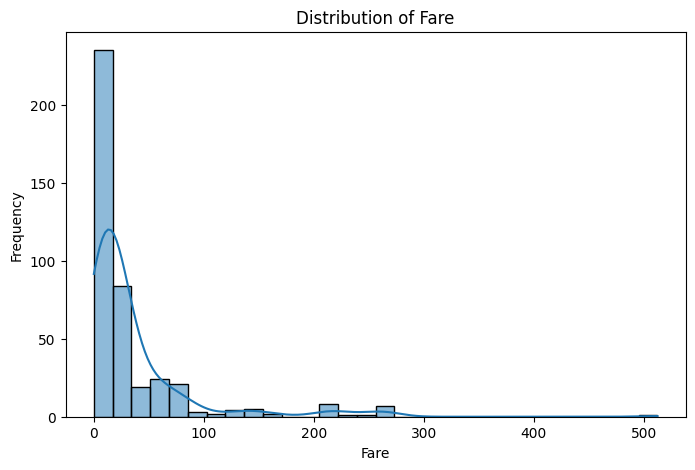

In [ ]:
# Distribution of numerical columns
numerical_columns = ['Age', 'Fare']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-21-02e6fd3f11b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='cool')


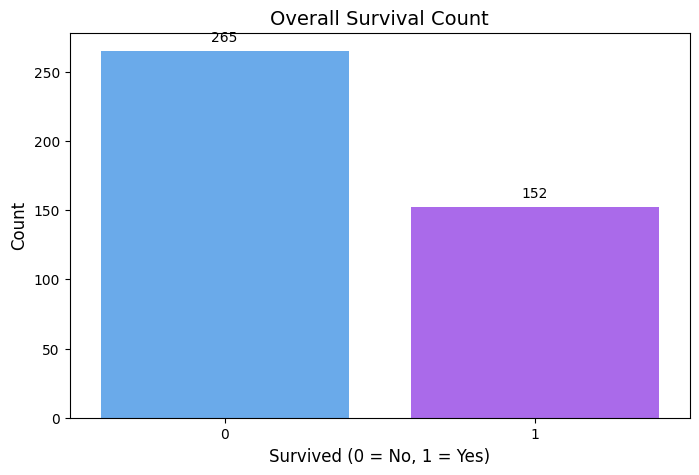

In [ ]:
# Survival Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data, palette='cool')
plt.title('Overall Survival Count', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, int(p.get_height()),
             ha='center', va='bottom')
plt.show()

In [ ]:
# Step 4: Export the cleaned data
data.to_csv(output_file_path, index=False)
print(f"\nCleaned data exported successfully to {output_file_path}")


Cleaned data exported successfully to /content/cleaned_titanic.csv
